# **Real Estate Price Predictor**

In [586]:
import pandas as pd

In [587]:
import matplotlib.pyplot as plt

In [588]:
housing = pd.read_csv("data3.CSV")

In [589]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN,NaN,NaN


In [590]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         506 non-null    float64
 1   ZN           506 non-null    float64
 2   INDUS        506 non-null    float64
 3   CHAS         506 non-null    int64  
 4   NOX          506 non-null    float64
 5   RM           506 non-null    float64
 6   AGE          506 non-null    float64
 7   DIS          506 non-null    float64
 8   RAD          506 non-null    int64  
 9   TAX          506 non-null    int64  
 10  PTRATIO      506 non-null    float64
 11  B            506 non-null    float64
 12  LSTAT        506 non-null    float64
 13  MEDV         506 non-null    float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
dtypes: float

In [591]:
housing["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [592]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,0.0,0.0,0.0,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,NaN,NaN,NaN,NaN,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,NaN,NaN,NaN,NaN,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,NaN,NaN,NaN,NaN,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,NaN,NaN,NaN,NaN,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,NaN,NaN,NaN,NaN,NaN
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,NaN,NaN,NaN,NaN,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,NaN,NaN,NaN,NaN,NaN


In [593]:
housing.shape

(506, 19)

In [594]:
%matplotlib inline

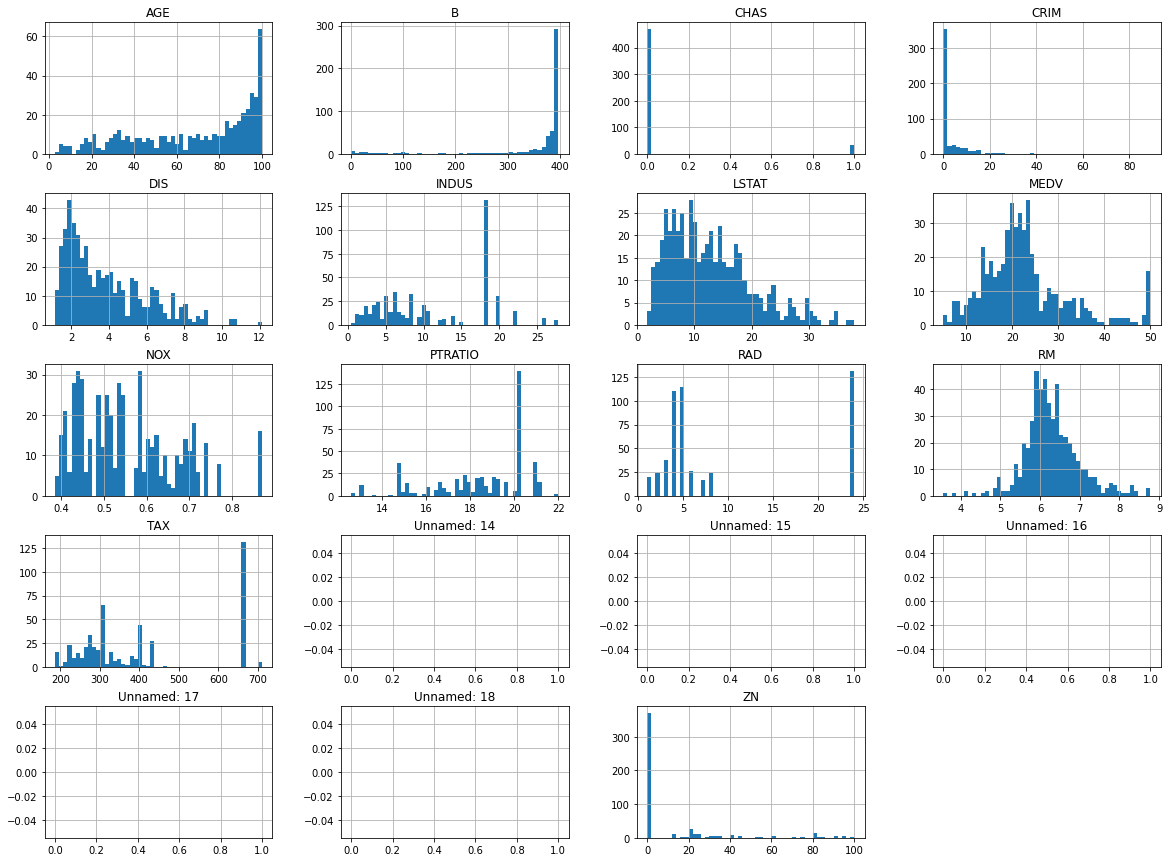

In [595]:
housing.hist(bins=50 , figsize=(20,15))
plt.show()

# Train Test Splitting 

In [596]:
import numpy as np
import sklearn

In [597]:
#def split_train_test(data , test_ratio):
  
 # np.random.seed(42)
  #shuffled = np.random.permutation(len(data))
  #print(shuffled)
  #test_size_data = int(len(data)*test_ratio)
  #test_indices = shuffled[:test_size_data]
  #train_indices = shuffled[test_size_data:]
  #return data.iloc[train_indices] , data.iloc[test_indices]

In [598]:
#train_set , test_set = split_train_test(housing , 0.2)
#print(f"Rows in train set : {len(train_set)} and Rows in test set : {len(test_set)}")

In [599]:
from sklearn.model_selection import train_test_split
#train_test_split?
train_set , test_set = train_test_split(housing , test_size = 0.2 , random_state = 42)
print(f"Rows in train set : {len(train_set)} and Rows in test set : {len(test_set)}")

Rows in train set : 404 and Rows in test set : 102


In [600]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1 , test_size = 0.2 , random_state = 42)
for train_index , test_index in split.split(housing , housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [601]:
strat_test_set.describe()
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

## LOOKING FOR CORRELATIONS

In [602]:
corr_matrix = housing.corr()

In [603]:
corr_matrix['MEDV'].sort_values(ascending = False)
# 1 is for strong positive correlation
#if one value is increasing then other will also increase
# -ve is for strong negative value correlation
# if one value is increasing then other will decrease

MEDV           1.000000
RM             0.695360
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
AGE           -0.376955
RAD           -0.381626
CRIM          -0.388305
NOX           -0.427321
TAX           -0.468536
INDUS         -0.483725
PTRATIO       -0.507787
LSTAT         -0.737663
Unnamed: 14         NaN
Unnamed: 15         NaN
Unnamed: 16         NaN
Unnamed: 17         NaN
Unnamed: 18         NaN
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3fd52b0cf8>,
      dtype=object)

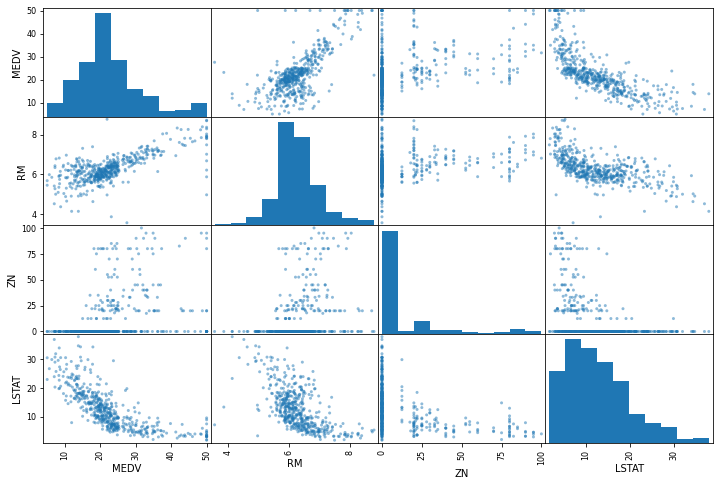

In [604]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV" , "RM" , "ZN" , "LSTAT"] 
scatter_matrix(housing[attributes] , figsize = (12,8))


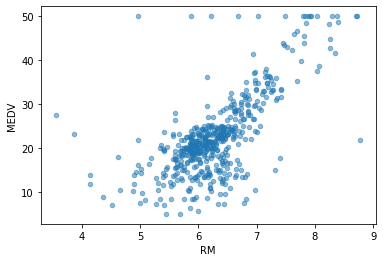

In [605]:
housing.plot(kind = "scatter" , x = "RM" , y = "MEDV" , alpha = 0.5)
plt.show()

## Trying out attributes combination


In [606]:
#housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [607]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN,NaN,NaN,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN,NaN,NaN,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN,NaN,NaN,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN,NaN,NaN,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN,NaN,NaN,NaN,NaN


In [608]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV           1.000000
RM             0.695360
ZN             0.360445
B              0.333461
DIS            0.249929
CHAS           0.175260
AGE           -0.376955
RAD           -0.381626
CRIM          -0.388305
NOX           -0.427321
TAX           -0.468536
INDUS         -0.483725
PTRATIO       -0.507787
LSTAT         -0.737663
Unnamed: 14         NaN
Unnamed: 15         NaN
Unnamed: 16         NaN
Unnamed: 17         NaN
Unnamed: 18         NaN
Name: MEDV, dtype: float64

In [609]:
#housing.plot(kind = "scatter" , x = "TAXRM" , y = "MEDV" , alpha = 0.5)
#plt.show()

In [610]:
## Missing Attributes 

In [611]:
a=housing.dropna(subset = ["RM"])
a.shape

(506, 19)

In [612]:
housing = strat_train_set.drop("MEDV" , axis=1)
housing_labels = strat_train_set["MEDV"].copy()

## Creating Pipeline

In [613]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


my_pipeline = Pipeline([
  ('imputer' , SimpleImputer(strategy = "median")),
  ('std_scalar' , StandardScaler()),
])

In [614]:
housing.shape

(404, 18)

In [615]:
print(train_set.shape)
print(test_set.shape)

(404, 19)
(102, 19)


In [616]:
housing_num_tr = my_pipeline.fit_transform(housing)
print(housing_num_tr)

[[-0.43942006  3.12628155 -1.12165014 ... -0.97491834  0.41164221
  -0.86091034]
 [-0.44352175  3.12628155 -1.35893781 ... -0.69277865  0.39131918
  -0.94116739]
 [ 0.15682292 -0.4898311   0.98336806 ...  0.81196637  0.44624347
   0.81480158]
 ...
 [-0.43525657 -0.4898311  -1.23083158 ... -0.22254583  0.41831233
  -1.27603303]
 [ 0.14210728 -0.4898311   0.98336806 ...  0.81196637 -3.15239177
   0.73869575]
 [-0.43974024 -0.4898311   0.37049623 ... -0.97491834  0.41070422
   0.09940681]]


In [617]:
housing_num_tr.shape

(404, 13)

## Selection Of Model

In [618]:
from sklearn.linear_model import  LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr , housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [619]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [620]:
prepared_data = my_pipeline.transform(some_data)

In [621]:
model.predict(prepared_data)

array([22.451, 25.494, 16.44 , 23.419, 23.608])

In [622]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [623]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels , housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.2054620432115482

In [624]:
##using better evaluation technique - cross validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model , housing_num_tr , housing_labels , scoring="neg_mean_squared_error" , cv=10)
rmse_scores = np.sqrt(-scores)

In [625]:
rmse_scores

array([2.89537918, 2.79722113, 4.58894952, 2.78279656, 3.19344674,
       2.59210812, 4.89915423, 3.38144161, 3.36593384, 3.3429476 ])

In [626]:
def Print_score(scores):
    print("scores : " , scores)
    print("Mean : " , scores.mean())
    print("Standard deviation : " , scores.std())

In [627]:
Print_score(rmse_scores)

scores :  [2.89537918 2.79722113 4.58894952 2.78279656 3.19344674 2.59210812
 4.89915423 3.38144161 3.36593384 3.3429476 ]
Mean :  3.3839378532874975
Standard deviation :  0.7319509887731857


In [628]:
from joblib import dump , load
dump(model , "RealEstate.joblib")

['RealEstate.joblib']

In [630]:
## TEsting of Data


X_test = strat_test_set.drop("MEDV" , axis = 1)
Y_test = strat_test_set["MEDV"].copy(0)
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test , final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_predictions , list(Y_test))


final_rmse

[24.349 11.627 26.065 21.992 18.889 14.871 19.781 14.42  31.09  41.458
 19.451 11.928 23.556 29.826 19.617 11.485 31.725 14.259 23.598 18.801
 19.992 17.968 19.144 22.192 18.634 31.517 16.25  33.751  9.025 33.215
 23.138 21.554 22.678 11.181 21.506 11.693 43.143 24.647 23.496 42.044
 24.049 30.755 20.276 21.181 18.743 33.545 44.586 20.223 20.291 21.959
 21.318 14.72  21.406 15.135 25.268 33.068 41.623 29.284 19.32  20.757
 47.041  9.918 19.366 24.39  14.744 33.092 20.441 17.73  19.342 34.168
 24.984 22.627 21.554 22.391 35.396 12.971 15.91  20.22  21.205 21.817
 22.324 21.287 14.252 22.742 20.644 21.445 13.761 21.593 21.959 23.211
 18.613 26.583  7.507 26.403 18.954 29.472 18.633 31.792 14.4   27.191
 20.878 20.445] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

3.0348107654931193